In [117]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [145]:
data = np.genfromtxt("C:\\Users\\***\\Downloads\\gl2018\\GL2018.txt",delimiter=',',usecols=(3,6,9,10), dtype= None,deletechars='\"',encoding=None)
allteams = np.genfromtxt("C:\\Users\\***\\Downloads\\gl2018\\TEAMABR.txt",delimiter=',',usecols=(0,3,5), dtype= None,deletechars='\"',encoding=None)
teams=allteams[allteams[:,2]=='\"2010\"',:]
w=np.where(teams=='"FLO"')
teams[w[0][0],w[1][0]]='\"MIA\"'
w=np.where(teams=='"HOU"')
teams[w[0][0],1]='"Astros"'
teamdic=dict(zip(teams[:,0].tolist(),teams[:,1].tolist()))

In [146]:
def findNextGame(data,team,start=0):
    gn=start
    foundTeam=False
    while not foundTeam:
        if gn>=data.size:
            return -1
        foundTeam = (data[gn][0][1:4]==team) or (data[gn][1][1:4]==team)
        gn+=1
    return gn-1

In [147]:
def gameWinner(data,gn):
    return data[gn][0][1:4] if data[gn][2] > data[gn][3] else data[gn][1][1:4]

In [148]:
def findPath(data,team):
    gn=findNextGame(data,team)
    gnList=[gn]
    retList=[team]
    wteam=team
    while gn >= 0:
        wteam=gameWinner(data,gn)
        retList.append(wteam)
        gnList.append(gn)
        gn=findNextGame(data,wteam,gn+1)
    return np.array(retList), np.array(gnList)

In [149]:
fullOutput=[]
for i in teams:
    wteam,gn=findPath(data,i[0][1:4])
    fullOutput.append([gn,wteam])

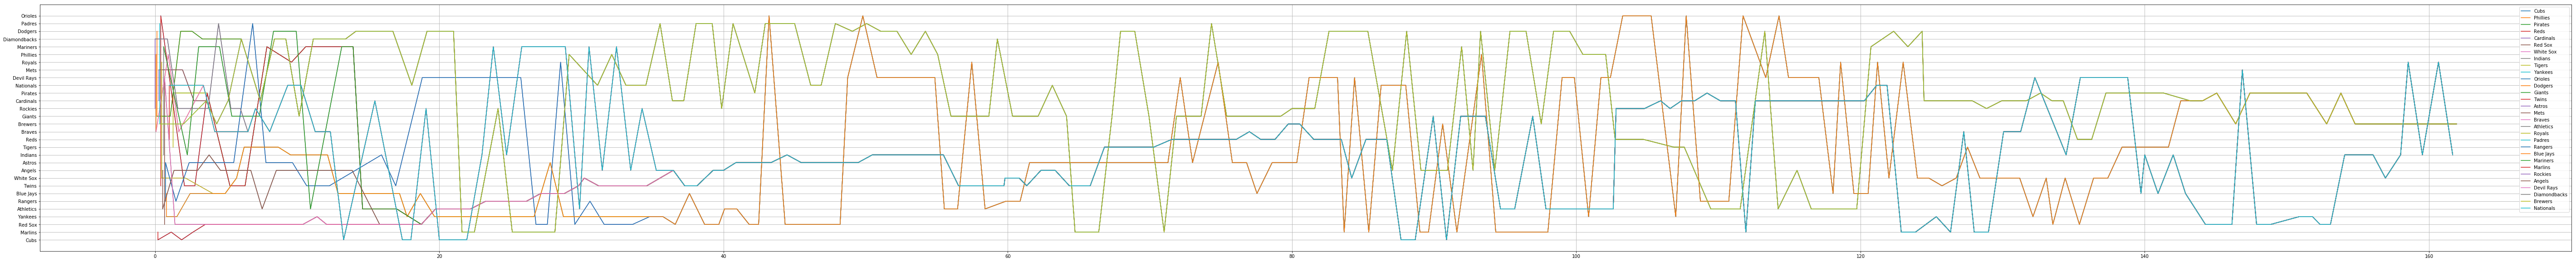

In [150]:
plt.figure(figsize=(100,10))
for i in teams:
    yi,xi=findPath(data,i[0][1:4])
    plt.plot(xi/15.,[teamdic['\"'+j+'\"'][1:-1] for j in yi],label=teamdic[i[0]][1:-1])
plt.legend()
plt.grid()
plt.show()

In [151]:
for i in fullOutput:
    print(i[1][0], i[1][-1])

CHN CLE
PHI CLE
PIT CLE
CIN CLE
SLN MIL
BOS CLE
CHA MIL
CLE CLE
DET CLE
NYA MIL
BAL CLE
LAN MIL
SFN MIL
MIN CLE
HOU MIL
NYN MIL
ATL CLE
OAK CLE
KCA MIL
SDN MIL
TEX MIL
TOR MIL
SEA CLE
MIA CLE
COL CLE
ANA CLE
TBA CLE
ARI CLE
MIL MIL
WAS CLE


In [152]:
for t in teams:
    num=0
    for i in fullOutput:
        num+=np.size(np.where(i[1]==t[0][1:4]))
    print('%12s' % t[1][1:-1],num)

        Cubs 89
    Phillies 51
     Pirates 155
        Reds 265
   Cardinals 347
     Red Sox 281
   White Sox 165
     Indians 323
      Tigers 145
     Yankees 157
     Orioles 51
     Dodgers 165
      Giants 183
       Twins 261
      Astros 269
        Mets 23
      Braves 109
   Athletics 307
      Royals 73
      Padres 65
     Rangers 71
   Blue Jays 153
    Mariners 85
     Marlins 227
     Rockies 135
      Angels 171
  Devil Rays 221
Diamondbacks 53
     Brewers 179
   Nationals 125


In [153]:
visitnos=[]
for t in fullOutput:
    visSet=set()
    for j in t[1]:
        visSet.add(j)
    print('%12s' %teamdic['\"'+t[1][0]+'\"'][1:-1],len(visSet))
    visitnos.append(len(visSet))

        Cubs 24
    Phillies 25
     Pirates 25
        Reds 24
   Cardinals 17
     Red Sox 24
   White Sox 19
     Indians 26
      Tigers 25
     Yankees 19
     Orioles 26
     Dodgers 16
      Giants 16
       Twins 26
      Astros 20
        Mets 17
      Braves 25
   Athletics 24
      Royals 19
      Padres 16
     Rangers 20
   Blue Jays 19
    Mariners 26
     Marlins 24
     Rockies 26
      Angels 24
  Devil Rays 24
Diamondbacks 26
     Brewers 16
   Nationals 24


In [154]:
np.mean(visitnos), np.std(visitnos)

(22.066666666666666, 3.6599939283495475)

In [155]:
for t in fullOutput:
    print('%12s' %teamdic['\"'+t[1][0]+'\"'][1:-1],len(t[0]))

        Cubs 165
    Phillies 162
     Pirates 163
        Reds 162
   Cardinals 160
     Red Sox 165
   White Sox 167
     Indians 162
      Tigers 163
     Yankees 169
     Orioles 163
     Dodgers 161
      Giants 161
       Twins 163
      Astros 164
        Mets 160
      Braves 162
   Athletics 166
      Royals 167
      Padres 160
     Rangers 164
   Blue Jays 169
    Mariners 162
     Marlins 165
     Rockies 163
      Angels 166
  Devil Rays 165
Diamondbacks 163
     Brewers 160
   Nationals 162


In [171]:
pcts=[]
for t in fullOutput:
    numWins=0
    numGames=(len(t[0]))
    for i in range(0,numGames-1):
        if gameWinner(data,t[0][i+1])==t[1][i]:
            numWins+=1
    print('%12s' %teamdic['\"'+t[1][0]+'\"'][1:-1],numWins,'-',numGames-numWins,'\t',1.*numWins/numGames)
    pcts.append(1.*numWins/numGames)

        Cubs 90 - 75 	 0.5454545454545454
    Phillies 75 - 87 	 0.46296296296296297
     Pirates 88 - 75 	 0.5398773006134969
        Reds 78 - 84 	 0.48148148148148145
   Cardinals 74 - 86 	 0.4625
     Red Sox 92 - 73 	 0.5575757575757576
   White Sox 89 - 78 	 0.5329341317365269
     Indians 84 - 78 	 0.5185185185185185
      Tigers 87 - 76 	 0.5337423312883436
     Yankees 91 - 78 	 0.5384615384615384
     Orioles 86 - 77 	 0.5276073619631901
     Dodgers 77 - 84 	 0.4782608695652174
      Giants 78 - 83 	 0.484472049689441
       Twins 85 - 78 	 0.5214723926380368
      Astros 82 - 82 	 0.5
        Mets 75 - 85 	 0.46875
      Braves 76 - 86 	 0.4691358024691358
   Athletics 91 - 75 	 0.5481927710843374
      Royals 88 - 79 	 0.5269461077844312
      Padres 74 - 86 	 0.4625
     Rangers 81 - 83 	 0.49390243902439024
   Blue Jays 90 - 79 	 0.5325443786982249
    Mariners 85 - 77 	 0.5246913580246914
     Marlins 89 - 76 	 0.5393939393939394
     Rockies 76 - 87 	 0.466257668711656

In [163]:
np.mean(pcts),np.std(pcts)

(0.5084079234833162, 0.032890303854161744)

In [165]:
np.min(pcts),np.max(pcts)

(0.4625, 0.5636363636363636)

In [176]:
len(np.where(np.array(pcts) < 0.5)[0])

13